In [5]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display





In [6]:
# DISPLAY WAVEPLOT
def display_waveplot(file_name, output_file_name, sr):
    samples, sr = librosa.load(file_name)
    plt.figure(figsize=(8, 4))
    librosa.display.waveplot(samples, sr=sr)
    plt.title(file_name + ' ' + output_file_name)
    plt.savefig(output_file_name)
    return samples

In [7]:
OLD_SAMPLING_RATE = 44100
HUMAIN_VOICE_SAMPLING_RATE = 8000
sampling_rate = HUMAIN_VOICE_SAMPLING_RATE

female_neutral_file = 'data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-01-01-01.wav'
female_angry_strong_file = 'data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-05-02-01-01-01.wav'

male_neutral_file = 'data/RAVDESS/Audio_Speech_Actors_01-24/Actor_02/03-01-01-01-01-01-02.wav'
male_angry_strong_file = 'data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-05-02-01-01-01.wav'

female_neutral_image = 'images/female_neutral.jpeg'
female_angry_strong_image = 'images/female_angry_strong.jpeg'

male_neutral_image = 'images/male_neutral.jpeg'
male_angry_strong_image = 'images/male_angry_strong.jpeg'

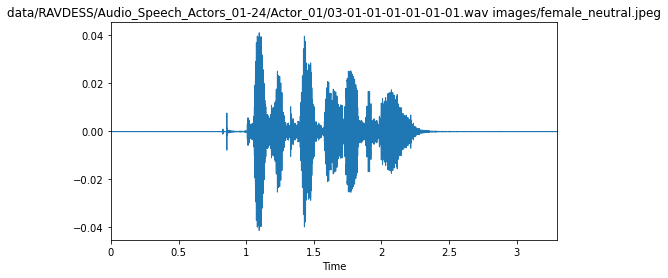

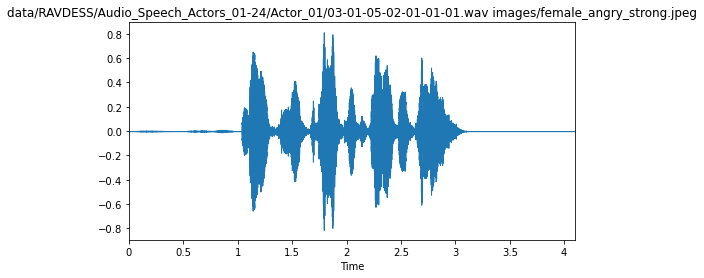

In [8]:
samples_female_neutral = display_waveplot(female_neutral_file, female_neutral_image, sampling_rate)
samples_female_angry_strong = display_waveplot(female_angry_strong_file, female_angry_strong_image, sampling_rate)

In [9]:
def display_spectrogram(samples, filename):
    ft = np.abs(librosa.stft(samples))
    plt.plot(ft);
    plt.title('Spectrum ' + filename);
    plt.xlabel('Frequency Bin');
    plt.ylabel('Amplitude');
    plt.savefig(filename + '_fq_t.jpeg')
    plt.show()

 #   plt.figure(figsize=(40, 20))

    librosa.display.specshow(ft, sr=sampling_rate, x_axis='time', y_axis='linear');
    plt.title('Spectrum ' + filename);

    plt.colorbar()
    plt.savefig(filename+ '_spectrogram.jpeg')
    plt.show()

    librosa.display.specshow(librosa.amplitude_to_db(ft, ref=np.max), y_axis='log', x_axis='time')
    plt.title(filename + ' Power Spectrogram')
    plt.colorbar(format="%+2.0f dB")
    plt.savefig(filename+ '_power_spectrogram.jpeg')
    plt.show()



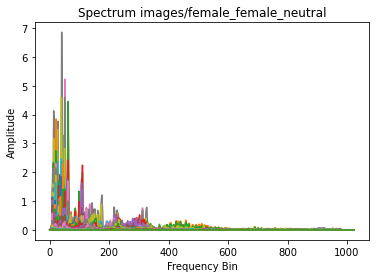

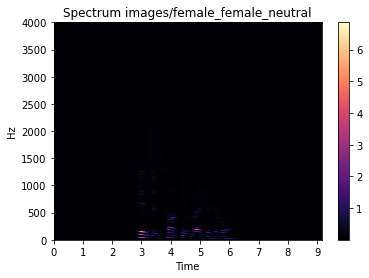

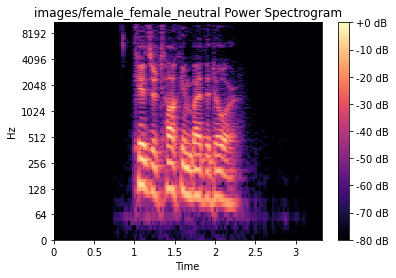

In [10]:
 display_spectrogram(samples_female_neutral, 'images/female_female_neutral')

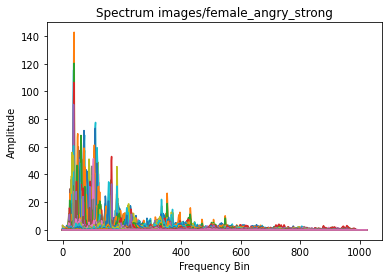

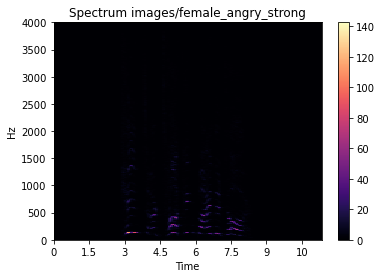

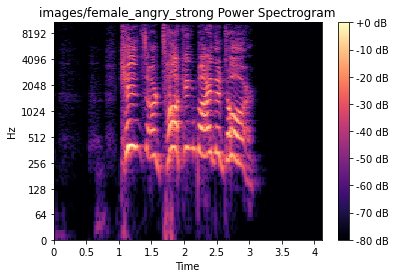

In [11]:
display_spectrogram(samples_female_angry_strong, 'images/female_angry_strong')

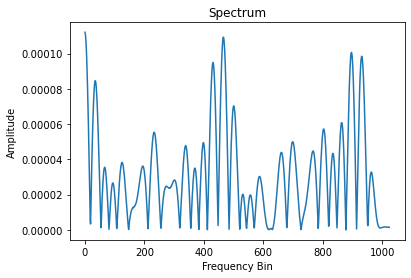

In [12]:
n_fft = 2048
ft = np.abs(librosa.stft(samples_female_neutral[:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

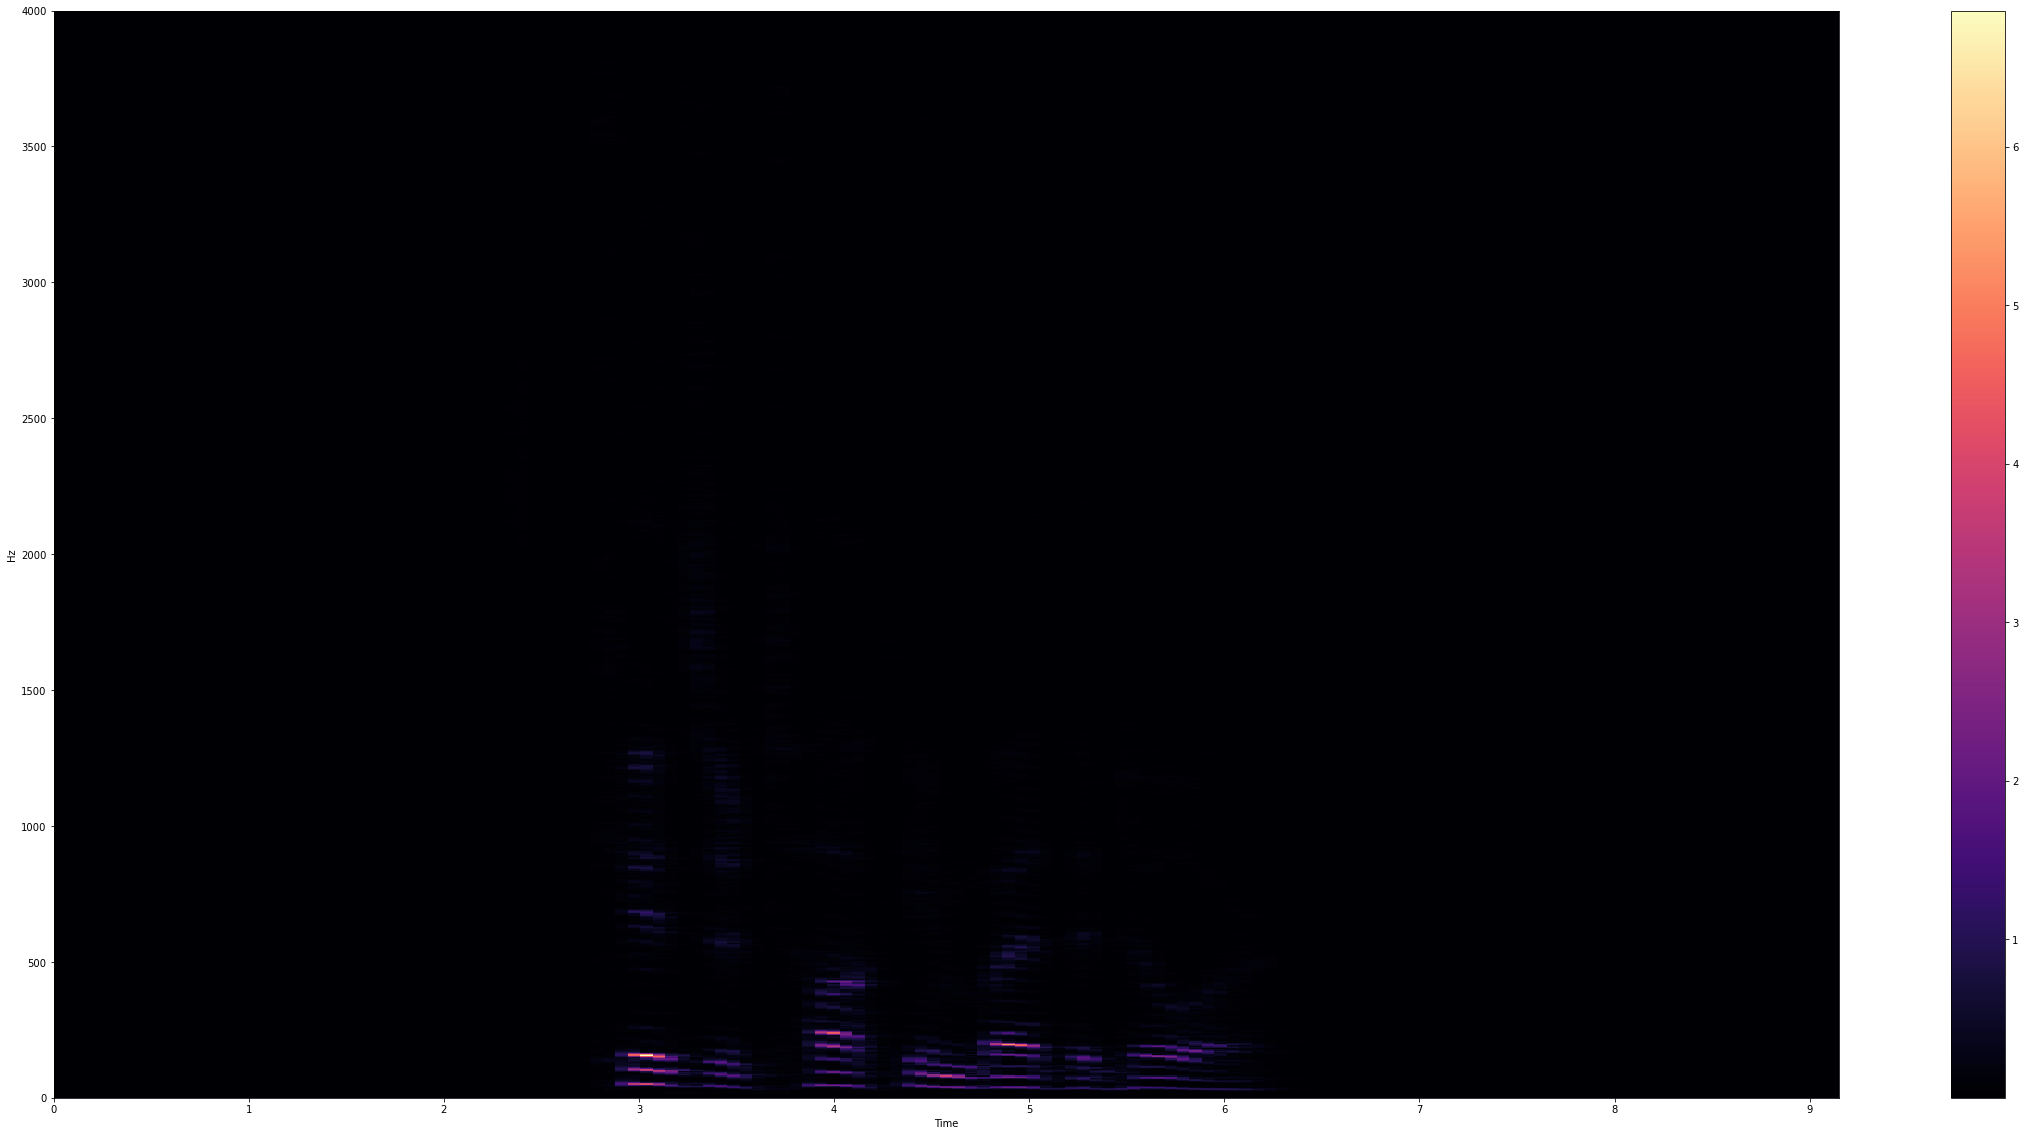

In [13]:
D = np.abs(librosa.stft(samples_female_neutral))
plt.figure(figsize=(40, 20))

librosa.display.specshow(D, sr=sampling_rate, x_axis='time', y_axis='linear');
plt.colorbar()
plt.savefig('images/female_neutral_image_fq_t.jpeg')
plt.show()



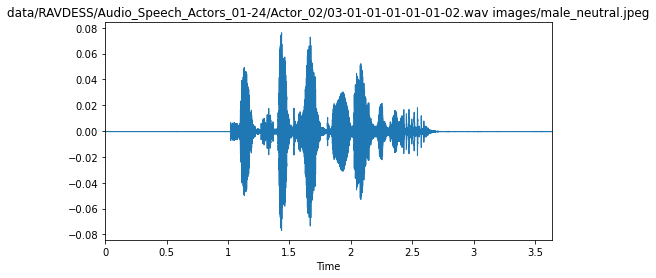

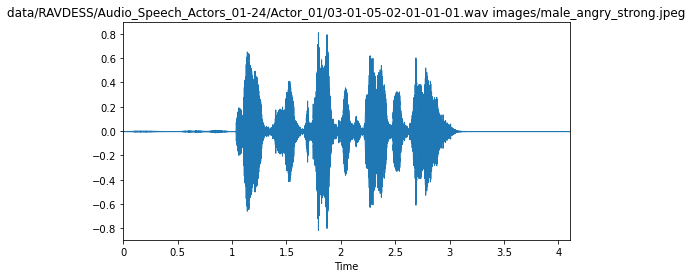

In [14]:
samples_male_neutral = display_waveplot(male_neutral_file, male_neutral_image, sampling_rate)
samples_male_angry_strong = display_waveplot(male_angry_strong_file, male_angry_strong_image, sampling_rate)

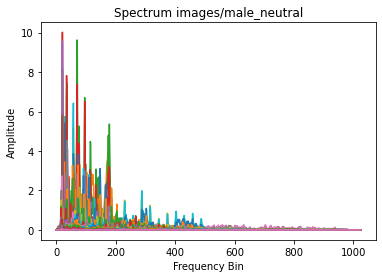

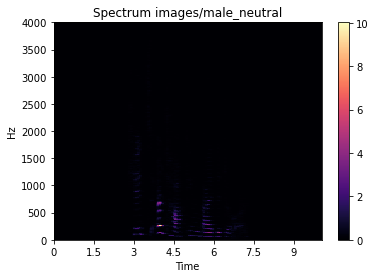

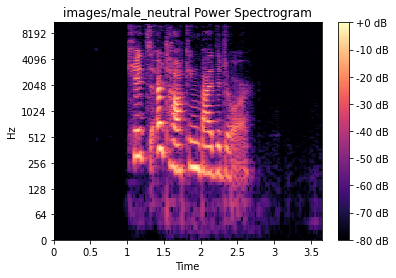

In [15]:
display_spectrogram(samples_male_neutral, 'images/male_neutral')

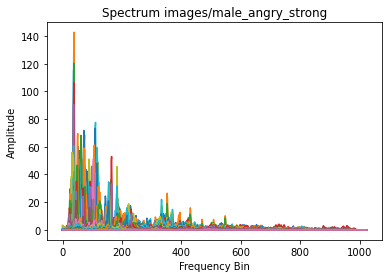

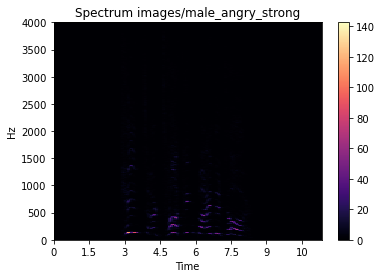

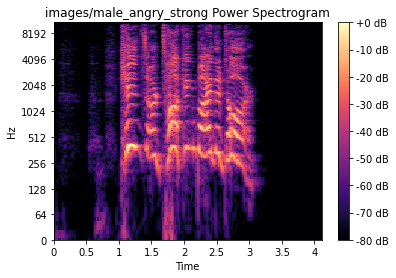

In [16]:
display_spectrogram(samples_male_angry_strong, 'images/male_angry_strong')

In [17]:

def mel_spectogram_db(file_name, mels=3, sr=sampling_rate):
    """Returns the mel spectrogram for a given audio file and mel count
        Args:
            file_name (str): File name of the WAV file
            mels (int): Target length in seconds
        Returns:
            numpy.ndarray: Numpy array of mel spectrogram values
    """
    data, sample_rate = librosa.load(file_name, res_type="kaiser_fast", sr=sr)
    print('sample_rate:', sample_rate)
    mel_spectogram = librosa.feature.melspectrogram(y=data, sr=sample_rate, n_mels=mels)
    mel_db = librosa.power_to_db(mel_spectogram, ref=np.max)
    return mel_db.T


In [18]:
mel = mel_spectogram_db(female_neutral_file)

sample_rate: 8000


In [19]:
mel

array([[-80.       , -80.       , -80.       ],
       [-80.       , -80.       , -80.       ],
       [-80.       , -80.       , -80.       ],
       [-79.5197   , -80.       , -80.       ],
       [-80.       , -80.       , -80.       ],
       [-80.       , -80.       , -80.       ],
       [-80.       , -80.       , -80.       ],
       [-80.       , -80.       , -80.       ],
       [-80.       , -80.       , -80.       ],
       [-80.       , -80.       , -80.       ],
       [-80.       , -80.       , -80.       ],
       [-73.179825 , -79.845856 , -80.       ],
       [-66.89894  , -74.19414  , -73.53955  ],
       [-62.2177   , -69.56795  , -65.87268  ],
       [-54.743168 , -64.40294  , -63.06119  ],
       [-27.38586  , -40.10864  , -35.333992 ],
       [ -5.773466 , -22.019249 , -18.648575 ],
       [  0.       , -15.978716 , -13.471712 ],
       [ -3.7252579, -19.449768 , -17.87421  ],
       [ -8.553875 , -18.592884 , -17.177391 ],
       [-10.558636 , -19.986446 , -18.41

In [20]:
np.shape(mel)

(52, 3)

In [21]:
mel2 = mel_spectogram_db(female_angry_strong_file)
mel2

sample_rate: 8000


array([[-59.41544  , -62.56151  , -65.875175 ],
       [-57.903404 , -57.133766 , -59.38365  ],
       [-53.866657 , -52.799637 , -54.687786 ],
       [-53.4558   , -52.092594 , -54.770157 ],
       [-56.706417 , -53.867855 , -56.683865 ],
       [-59.43595  , -56.85136  , -60.01174  ],
       [-62.738064 , -60.51341  , -63.444725 ],
       [-65.72637  , -65.514084 , -68.569305 ],
       [-52.31592  , -56.427895 , -60.26795  ],
       [-46.144993 , -49.8557   , -53.74914  ],
       [-44.31606  , -50.148    , -54.115253 ],
       [-45.64007  , -54.101067 , -57.9685   ],
       [-49.2847   , -52.809082 , -54.05039  ],
       [-46.72991  , -47.259506 , -47.53216  ],
       [-48.082523 , -48.23078  , -47.29125  ],
       [-43.472446 , -47.82923  , -39.080387 ],
       [-23.056993 , -30.764423 , -22.761871 ],
       [ -5.8156214, -16.456106 , -14.9965515],
       [  0.       , -12.749583 , -12.008932 ],
       [ -0.8577099, -16.11097  , -15.721825 ],
       [ -6.2807493, -23.438166 , -24.05

In [22]:
mel3 = mel_spectogram_db(male_neutral_file)
mel3

sample_rate: 8000


array([[-80.       , -80.       , -80.       ],
       [-80.       , -80.       , -80.       ],
       [-80.       , -80.       , -80.       ],
       [-80.       , -80.       , -80.       ],
       [-80.       , -80.       , -80.       ],
       [-80.       , -80.       , -80.       ],
       [-80.       , -80.       , -80.       ],
       [-80.       , -80.       , -80.       ],
       [-75.75667  , -80.       , -80.       ],
       [-69.08402  , -78.25485  , -77.153656 ],
       [-72.45878  , -79.54704  , -78.06623  ],
       [-72.81632  , -78.29941  , -75.22113  ],
       [-71.993774 , -77.652565 , -75.47119  ],
       [-76.73839  , -80.       , -80.       ],
       [-76.79095  , -80.       , -80.       ],
       [-45.019093 , -50.518333 , -44.140247 ],
       [-19.18259  , -33.5176   , -29.304539 ],
       [ -4.9667478, -19.211637 , -16.863125 ],
       [ -2.6735759, -17.105541 , -14.924709 ],
       [ -9.305353 , -24.813776 , -22.44205  ],
       [-15.809616 , -29.18713  , -30.94

In [23]:
mel4 = mel_spectogram_db(male_angry_strong_file)
mel4

sample_rate: 8000


array([[-59.41544  , -62.56151  , -65.875175 ],
       [-57.903404 , -57.133766 , -59.38365  ],
       [-53.866657 , -52.799637 , -54.687786 ],
       [-53.4558   , -52.092594 , -54.770157 ],
       [-56.706417 , -53.867855 , -56.683865 ],
       [-59.43595  , -56.85136  , -60.01174  ],
       [-62.738064 , -60.51341  , -63.444725 ],
       [-65.72637  , -65.514084 , -68.569305 ],
       [-52.31592  , -56.427895 , -60.26795  ],
       [-46.144993 , -49.8557   , -53.74914  ],
       [-44.31606  , -50.148    , -54.115253 ],
       [-45.64007  , -54.101067 , -57.9685   ],
       [-49.2847   , -52.809082 , -54.05039  ],
       [-46.72991  , -47.259506 , -47.53216  ],
       [-48.082523 , -48.23078  , -47.29125  ],
       [-43.472446 , -47.82923  , -39.080387 ],
       [-23.056993 , -30.764423 , -22.761871 ],
       [ -5.8156214, -16.456106 , -14.9965515],
       [  0.       , -12.749583 , -12.008932 ],
       [ -0.8577099, -16.11097  , -15.721825 ],
       [ -6.2807493, -23.438166 , -24.05

In [36]:
def getMfcc(samples, sr):
    mfcc = librosa.feature.mfcc(y=samples, sr=sr, n_mfcc=13)
    mfcc = mfcc.T
    return mfcc

In [37]:
#generaly chosse first 13, by default n_mfcc=20
# https://towardsdatascience.com/how-i-understood-what-features-to-consider-while-training-audio-files-eedfb6e9002b
mfcc = getMfcc(samples_male_neutral, sampling_rate)
print(mfcc)

[[-791.1237       0.           0.        ...    0.           0.
     0.       ]
 [-791.1237       0.           0.        ...    0.           0.
     0.       ]
 [-791.1237       0.           0.        ...    0.           0.
     0.       ]
 ...
 [-771.7448      25.987865    22.43743   ...    7.6739655    6.7814646
     5.5955753]
 [-772.4955      24.866333    21.135181  ...    4.8419666    3.4329531
     2.8107672]
 [-776.446       19.92353     17.72459   ...    5.281807     5.035881
     4.962492 ]]


In [38]:
np.shape(mfcc) , np.shape(samples_male_neutral)

((157, 13), (80195,))

In [39]:
librosa.get_duration(filename = female_neutral_file)

3.3032916666666665

In [40]:
samples_female_neutral_trimed, index = librosa.effects.trim(samples_female_neutral)

In [43]:
print(librosa.get_duration(samples_female_neutral), librosa.get_duration(samples_female_neutral_trimed))

3.3033106575963718 2.136235827664399


In [44]:
samples_female_neutral_trimed

array([-9.6388499e-07,  3.0410267e-06,  1.2423825e-05, ...,
        1.1471687e-08, -9.4701100e-09,  6.8961006e-09], dtype=float32)

In [53]:
len(samples_female_neutral_trimed)

47104

In [54]:
len(samples_female_neutral)

72838